In [1]:
import natsort
import glob
import numpy as np
import pandas as pd
#import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#glob.glob('underworld2/results/A/**/metrics.csv'), glob.glob('underworld2/results/A/**/solver.csv')
#glob.glob('underworld2/results/C/**/*.csv')

In [3]:
## String formatting
print('{} {}'.format('one', 'two'))

#By default values are formatted to take up only as many characters as needed to represent the content. 
#It is however also possible to define that a value should be padded to a specific length.
print('{:>10}'.format('test'))
print('{:10}'.format('test'))

#numbers
print('{} {}'.format(1, 2))

print('{1} {0}'.format(1, 2))

print('{:d}'.format(42))

print('{:f}'.format(3.141592653589793))

#For floating points the padding value represents the length of the complete output. 
#In the example below we want our output to have at least 6 characters with 2 after the decimal point.
print('{:5.2f}'.format(3.141592653589793))

print('{:05.2f}'.format(3.141592653589793))

#combining

print('{} {:05.2f}'.format('one', 3.141592653589793))

one two
      test
test      
1 2
2 1
42
3.141593
 3.14
03.14
one 03.14


In [4]:
mHeaders = ['rmsint', 'shearArea' ,'shearPressure', 'backgroundArea', 'backgroundPressure', 
            'viscmin', 'viscmax', 'eiimin', 'eiimax', 'angle', 'vdint', 'shearVd', 'backgroundVd', 'pressmin', 'pressmax' ]

pHeaders = ['U0','a','asthenosphere','cohesion','depth','eta1','eta2','etaMin','fa','g','notchWidth','rho']

In [5]:
#natsort.natsort(glob.glob('../underworld2/results/A/**/metrics.csv'))

In [46]:
def get_data(path1, path2):
    data = []
    params = []
    metricFiles = natsort.natsort(glob.glob(path1))
    paramFiles = natsort.natsort(glob.glob(path2))
    print(len(metricFiles))
    
    for i in range(len(metricFiles)):
        d = pd.read_csv(metricFiles[i], header=None)
        d.columns = mHeaders
        p = pd.read_csv(paramFiles[i], header=None, skip_footer=1)
        #p.columns = pHeaders 
        data.append(d)
        params.append(p)

    return data, params


In [47]:
dataA, paramsA = get_data('../underworld2/results/A/**/metrics.csv', '../underworld2/results/A/**/params.csv')
dataB, paramsB = get_data('../underworld2/results/B/**/metrics.csv', '../underworld2/results/B/**/params.csv')
dataC, paramsC = get_data('../underworld2/results/C/**/metrics.csv', '../underworld2/results/C/**/params.csv')
dataD, paramsD = get_data('../underworld2/results/D/**/metrics.csv', '../underworld2/results/D/**/params.csv')
dataE, paramsE = get_data('../underworld2/results/E/**/metrics.csv', '../underworld2/results/E/**/params.csv')
#


6
6
6
27


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


30


```
counter=1
c=1.0
for a in 1.0 0.8 0.6 0.4 0.2 0.1
do
   b=$(echo "$c/$a" | bc -l)
   docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py A $counter md.res=96 dp.eta1*=$a dp.eta2*=$a dp.U0*=$b
   #docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py B $counter md.res=96 dp.eta1*=$a dp.eta2*=1. dp.U0*=$b
   #docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py C $counter md.res=96 dp.eta1*=1.0 dp.eta2*=$a dp.U0*=1.0
   #echo $a $b
   let counter=counter+1
done

```

```
counter=1
c=1.0
for a in 0.5 1.0 2.0
do
   for b in 0.1 1.0 10.0
   do
      for c in 48 64 96
      do
         docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py D $counter dp.notchWidth*=$a md.res=$c dp.eta2*=$b
         #echo $counter $a $b $c
         let counter=counter+1
      done
   done
done


#b=$(echo "$c/$a" | bc -l)
```

```
counter=1
c=1.0
for a in 0.5 1.0 2.0
do
   for b in 0.0 10.0 20.0 30.0 40.0
   do
      for c in 64 96
      do
         #docker run -v $PWD:/workspace  -i -t --rm dansand/underworld2-dev mpirun -np 16 python isotropic.py E $counter dp.notchWidth*=$a md.res=$c dp.fa*=$b
         echo $counter $a $b $c
         let counter=counter+1
      done
   done
done

```

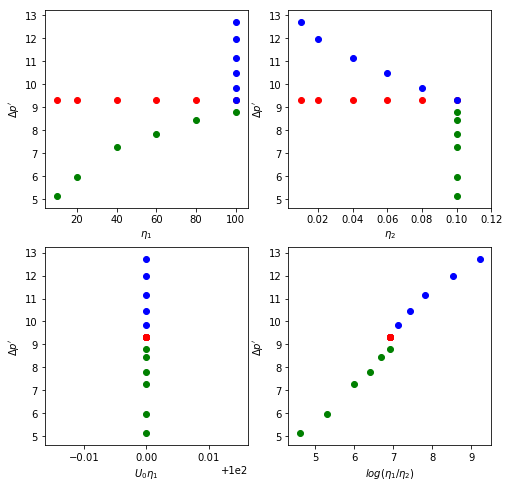

In [8]:
#fig, (ax0, ax1), (ax2, ax3) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

fig = plt.figure(figsize=(8, 8))
ax0 = plt.subplot(2, 2, 1)


for i in range(0,len(dataA)):
    ax0.scatter((paramsA[i]['eta1'][1]), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax0.scatter((paramsB[i]['eta1'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax0.scatter((paramsC[i]['eta1'][1]), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')

ax0.set_xlabel('$\eta_1$')
ax0.set_ylabel("$\Delta p'$")    

ax1 = plt.subplot(2, 2, 2)

for i in range(0,len(dataA)):
    ax1.scatter((paramsA[i]['eta2'][1]), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax1.scatter((paramsB[i]['eta2'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax1.scatter((paramsC[i]['eta2'][1]), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')

ax1.set_xlabel('$\eta_2$')
ax1.set_ylabel("$\Delta p'$")  
 
    
ax2 = plt.subplot(2, 2, 3)    
#ax2.get_xaxis().get_major_formatter().set_scientific(False)
for i in range(0,len(dataA)):
    ax2.scatter(paramsA[i]['U0'][1]*(paramsA[i]['eta1'][1]), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax2.scatter(paramsB[i]['U0'][1]*(paramsB[i]['eta1'][1]), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax2.scatter(paramsC[i]['U0'][1]*(paramsC[i]['eta1'][1]), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')


ax2.set_xlabel('$U_0\eta_1$')
ax2.set_ylabel("$\Delta p'$")


ax3 = plt.subplot(2, 2, 4)

for i in range(0,len(dataA)):
    ax3.scatter(np.log((paramsA[i]['eta1'][1]/paramsA[i]['eta2'][1])), dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    ax3.scatter(np.log((paramsB[i]['eta1'][1]/paramsB[i]['eta2'][1])), dataB[i]['pressmax'] - dataB[i]['pressmin'], c='g')
    ax3.scatter(np.log((paramsC[i]['eta1'][1]/paramsC[i]['eta2'][1])), dataC[i]['pressmax'] - dataC[i]['pressmin'], c='b')

ax3.set_xlabel('$log(\eta_1 / \eta_2$)')
ax3.set_ylabel("$\Delta p'$")
#ax.set_xscale('log')
#ax.legend(loc=4, prop={'size':8})

#fig.savefig('pressures.png')

In [9]:
mar = 'eta2'
uniqs = np.unique([float(i[mar ][1]) for i in paramsD])
print(uniqs)

mMap = {}
mMap[uniqs[0]] = '*'
mMap[uniqs[1]] = 'o'
mMap[uniqs[2]] = '+'

[ 0.01  0.1   1.  ]


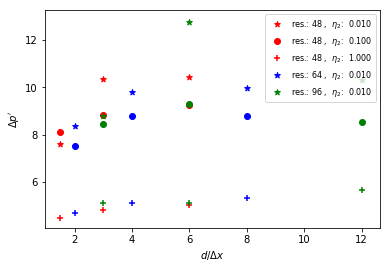

In [10]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'notchWidth'

for i in range(0,len(dataD), 3):
    #print(i)
    ax.scatter((paramsD[i][col][1]*48.), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='r', \
               marker=mMap[paramsD[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 48', ',  $\eta_2$:', paramsD[i]['eta2'][1]))
    
for i in range(1,len(dataD), 3):
    ax.scatter((paramsD[i][col][1]*64.), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='b', \
               marker=mMap[paramsD[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsD[i]['eta2'][1]))
    

for i in range(2,len(dataD), 3):
    ax.scatter((paramsD[i][col][1]*96), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='g',  \
               marker=mMap[paramsD[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsD[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$d/ \Delta x$')
ax.set_ylabel("$\Delta p'$")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
ax.legend(handles,labels, loc=1, prop={'size':8})

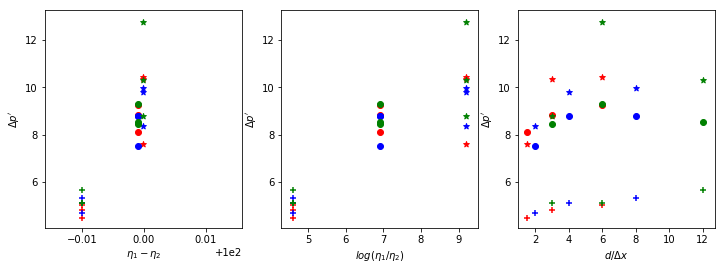

In [11]:
fig = plt.figure(figsize=(12, 4))
ax0 = plt.subplot(1, 3, 1)
#fig = plt.figure(figsize=(8, 8))

col = 'eta2'

for i in range(0,len(dataD), 3):
    #print(i)
    ax0.scatter((paramsD[i]['eta1'][1]) - (paramsD[i]['eta2'][1])/paramsD[i]['eta1'][1], dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='r', marker=mMap[paramsD[i][mar][1]])
    
for i in range(1,len(dataD), 3):
    #print(i)
    ax0.scatter((paramsD[i]['eta1'][1]) - (paramsD[i]['eta2'][1])/paramsD[i]['eta1'][1], dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='b', marker=mMap[paramsD[i][mar][1]])
    
    
for i in range(2,len(dataD), 3):
    #print(i)
    ax0.scatter((paramsD[i]['eta1'][1]) - (paramsD[i]['eta2'][1])/paramsD[i]['eta1'][1], dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='g', marker=mMap[paramsD[i][mar][1]])

    
ax0.set_xlabel('$\eta_1 - \eta_2$')
ax0.set_ylabel("$\Delta p'$")
    
ax1 = plt.subplot(1, 3, 2)
    
for i in range(0,len(dataD), 3):
    #print(i)
    ax1.scatter(np.log((paramsD[i]['eta1'][1]) / (paramsD[i]['eta2'][1])), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='r', marker=mMap[paramsD[i][mar][1]])
    
for i in range(1,len(dataD), 3):
    #print(i)
    ax1.scatter(np.log((paramsD[i]['eta1'][1]) / (paramsD[i]['eta2'][1])), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='b', marker=mMap[paramsD[i][mar][1]])
    
    
for i in range(2,len(dataD), 3):
    #print(i)
    ax1.scatter(np.log((paramsD[i]['eta1'][1]) / (paramsD[i]['eta2'][1])), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='g', marker=mMap[paramsD[i][mar][1]])
    
    
ax1.set_xlabel('$log(\eta_1 / \eta_2$)')
ax1.set_ylabel("$\Delta p'$")


ax2 = plt.subplot(1, 3, 3)



col = 'notchWidth'

for i in range(0,len(dataD), 3):
    #print(i)
    ax2.scatter((paramsD[i][col][1]*48.), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='r', marker=mMap[paramsD[i][mar][1]])
    
for i in range(1,len(dataD), 3):
    ax2.scatter((paramsD[i][col][1]*64.), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='b', marker=mMap[paramsD[i][mar][1]])

for i in range(2,len(dataD), 3):
    ax2.scatter((paramsD[i][col][1]*96), dataD[i]['pressmax'][::3] - dataD[i]['pressmin'][::3], c='g',  marker=mMap[paramsD[i][mar][1]])
    
    
ax2.set_xlabel('$d/ \Delta x$')
ax2.set_ylabel("$\Delta p'$")

## E

In [12]:
mar = 'notchWidth'
uniqs = np.unique([float(i[mar ][1]) for i in paramsE])
print(uniqs)

mMap = {}
mMap[uniqs[0]] = '*'
mMap[uniqs[1]] = 'o'
mMap[uniqs[2]] = '+'

[ 0.03125  0.0625   0.125  ]


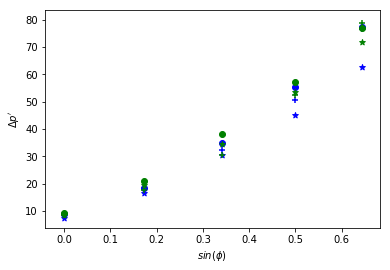

In [13]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['pressmax'][::3] - dataE[i]['pressmin'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['pressmax'][::3] - dataE[i]['pressmin'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$sin(\phi)$')
ax.set_ylabel("$\Delta p'$")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})

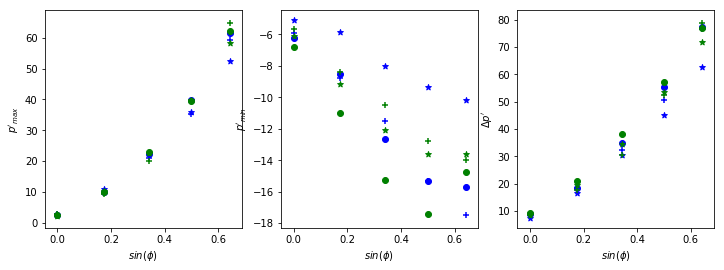

In [14]:
fig = plt.figure(figsize=(12, 4))
ax0 = plt.subplot(1, 3, 1)

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax0.scatter((paramsE[i][col][1]), dataE[i]['pressmax'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax0.scatter((paramsE[i][col][1]), dataE[i]['pressmax'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax0.set_xlabel('$sin(\phi)$')
ax0.set_ylabel("$p'_{max}$")


#now we cut down the legend entries to a minimal set

#handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})


ax1 = plt.subplot(1, 3, 2)

for i in range(0,len(dataE), 2):
    #print(i)
    ax1.scatter((paramsE[i][col][1]), dataE[i]['pressmin'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax1.scatter((paramsE[i][col][1]), dataE[i]['pressmin'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax1.set_xlabel('$sin(\phi)$')
ax1.set_ylabel("$p'_{min}$")




ax2 = plt.subplot(1, 3, 3)

for i in range(0,len(dataE), 2):
    #print(i)
    ax2.scatter((paramsE[i][col][1]), dataE[i]['pressmax'][::3] - dataE[i]['pressmin'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax2.scatter((paramsE[i][col][1]), dataE[i]['pressmax'][::3] - dataE[i]['pressmin'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax2.set_xlabel('$sin(\phi)$')
ax2.set_ylabel("$\Delta p'$")

In [15]:
dataE[0].columns

Index([u'rmsint', u'shearArea', u'shearPressure', u'backgroundArea',
       u'backgroundPressure', u'viscmin', u'viscmax', u'eiimin', u'eiimax',
       u'angle', u'vdint', u'shearVd', u'backgroundVd', u'pressmin',
       u'pressmax'],
      dtype='object')

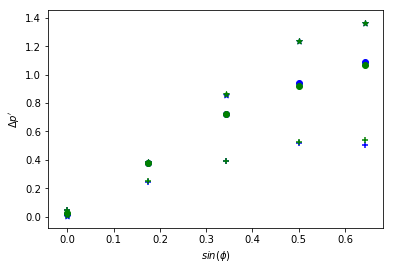

In [16]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['shearPressure'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['shearPressure'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$sin(\phi)$')
ax.set_ylabel("$\Delta p'$")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})

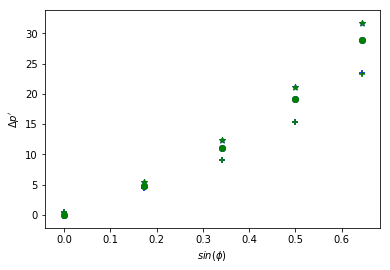

In [17]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['backgroundPressure'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['backgroundPressure'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$sin(\phi)$')
ax.set_ylabel("$\Delta p'$")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})

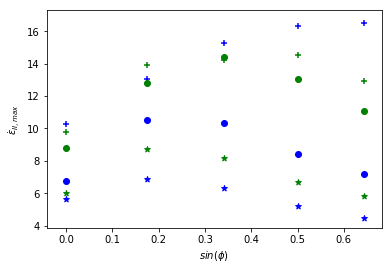

In [18]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['eiimax'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['eiimax'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$sin(\phi)$')
ax.set_ylabel("$\dot\epsilon_{II, max}$")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})

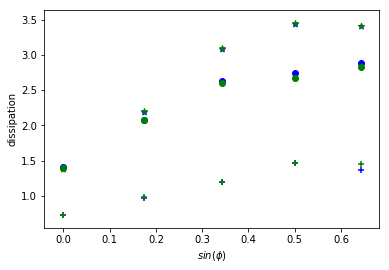

In [19]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['shearVd'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['shearVd'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$sin(\phi)$')
ax.set_ylabel("dissipation")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})

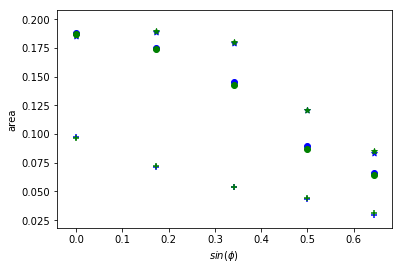

In [20]:
fig, ax = plt.subplots()

#fig = plt.figure(figsize=(8, 8))

col = 'fa'

    
for i in range(0,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['shearArea'][::3], c='b', \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    

for i in range(1,len(dataE), 2):
    #print(i)
    ax.scatter((paramsE[i][col][1]), dataE[i]['shearArea'][::3], c='g',  \
               marker=mMap[paramsE[i][mar][1]], label = '{} {} {:6.3f}'.format('res.: 96', ',  $\eta_2$:', paramsE[i]['eta2'][1]))
    
    
    
ax.set_xlabel('$sin(\phi)$')
ax.set_ylabel("area")


#now we cut down the legend entries to a minimal set

handles, labels = ax.get_legend_handles_labels()
#labels = [labels[0], labels[1] ,labels[2] , labels[9],  labels[-3]]
#handles = [handles[0] , handles[1], handles[2],  handles[9],  handles[-3] ]
#ax.legend(handles,labels, loc=1, prop={'size':8})

In [21]:
## convergence

In [22]:
#natsort.natsorted(glob.glob('../underworld2/results/E/**/solver.csv'))

In [25]:
res1 = []


for f in natsort.natsort(glob.glob('../underworld2/results/E/**/solver.csv')):
    #print(f)
    s = np.loadtxt(f, delimiter=',')
    res1.append(s[0])

In [26]:
col = 'fa'
uniqs = np.unique([float(i[col][1]) for i in paramsE])
print(uniqs)

cMap = {}
cMap[uniqs[0]] = 'r'
cMap[uniqs[1]] = 'g'
cMap[uniqs[2]] = 'b'
cMap[uniqs[3]] = 'k'
cMap[uniqs[4]] = 'y'

[ 0.          0.17364818  0.34202014  0.5         0.64278761]


In [27]:
#paramsE[0][col]

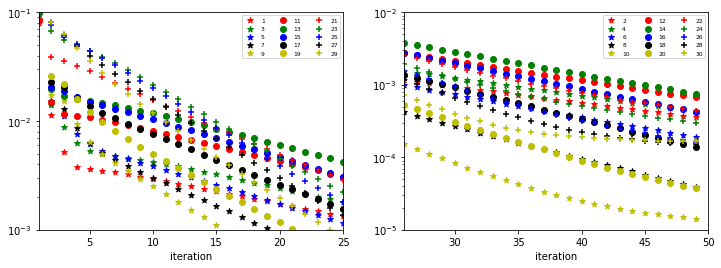

In [28]:
fig = plt.figure(figsize=(12, 4))
ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

    
for i in range(0,len(res1), 2):
    #print(i)
    ax0.scatter(range(len(res1[i])), res1[i], marker=mMap[paramsE[i][mar][1]], c= cMap[paramsE[i][col][1]], label=str(i + 1))
    
    
for i in range(1,len(dataE), 2):
    #print(i)
    ax1.scatter(range(len(res1[i])), res1[i], marker=mMap[paramsE[i][mar][1]], c= cMap[paramsE[i][col][1]], label=str(i + 1))
    



    
ax0.set_yscale('log')
ax0.set_ylim(1e-3,0.1)
ax0.set_xlim(1,25.)
ax0.legend(loc=1, ncol=3, prop={'size':6})
ax0.set_xlabel('iteration')



ax1.set_yscale('log')
ax1.set_ylim(1e-5,1e-2)
ax1.set_xlim(26,50.)
ax1.legend(loc=1, ncol=3, prop={'size':6})
ax1.set_xlabel('iteration')

    
#ax.set_xlabel('$sin(\phi)$')
#ax.set_ylabel("area")


In [29]:
#label = '{} {} {:6.3f}'.format('res.: 64', ',  $\eta_2$:', paramsE[i]['eta2'][1]))

In [30]:
i, cMap[paramsE[i][col][1]], paramsE[i][col][1]

(29, 'y', 0.64278760968653925)

## F